## **Data Loading**

In [ ]:

# Mounting  Google Drive if the dataset is stored there
from google.colab import drive
drive.mount('/content/drive')


KeyboardInterrupt: 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
# Specifying the path to our dataset
file_path = '/content/drive/uk/MyDrive/comp1804_coursework_dataset_23-24.csv (1).csv'

# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Displaying the first few rows of the DataFrame
df.head(20)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/uk/MyDrive/comp1804_coursework_dataset_23-24.csv (1).csv'

## **Data Exploration**

In [ ]:
# Checking the shape of the dataframe
print("Shape of dataframe:", df.shape)

Shape of dataframe: (9347, 8)


In [ ]:
# Checking data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9347 entries, 0 to 9346
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   par_id              9347 non-null   int64  
 1   paragraph           9347 non-null   object 
 2   has_entity          9347 non-null   object 
 3   lexicon_count       9347 non-null   int64  
 4   difficult_words     9329 non-null   float64
 5   last_editor_gender  9347 non-null   object 
 6   category            9286 non-null   object 
 7   text_clarity        9 non-null      object 
dtypes: float64(1), int64(2), object(5)
memory usage: 584.3+ KB
None


In [ ]:
# Checking for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 par_id                   0
paragraph                0
has_entity               0
lexicon_count            0
difficult_words         18
last_editor_gender       0
category                61
text_clarity          9338
dtype: int64


In [ ]:
# Exploring unique categories in the 'category' column
print("Unique categories:", df['category'].unique())
print("Unique categories:", df['text_clarity'].unique())

Unique categories: ['biographies' 'artificial intelligence' 'programming' 'philosophy'
 'movies about artificial intelligence' 'Philosophy' nan 'Programming'
 'Artificial intelligence' 'Biographies'
 'Movies about artificial intelligence']
Unique categories: ['clear_enough' 'not_clear_enough' nan]


In [ ]:
# Summary statistics for numerical columns
print("Summary statistics for numerical columns:\n", df.describe())

Summary statistics for numerical columns:
              par_id  lexicon_count  difficult_words
count  9.347000e+03    9347.000000      9329.000000
mean   3.568369e+11      81.981277        21.514203
std    3.221399e+11      63.533532        16.307358
min    8.500328e+07       0.000000         0.000000
25%    7.019601e+10      33.000000         9.000000
50%    2.684380e+11      64.000000        17.000000
75%    6.124310e+11     117.000000        30.000000
max    1.058779e+12     653.000000       143.000000


## **Data Cleaning**

## **Data Visualization**

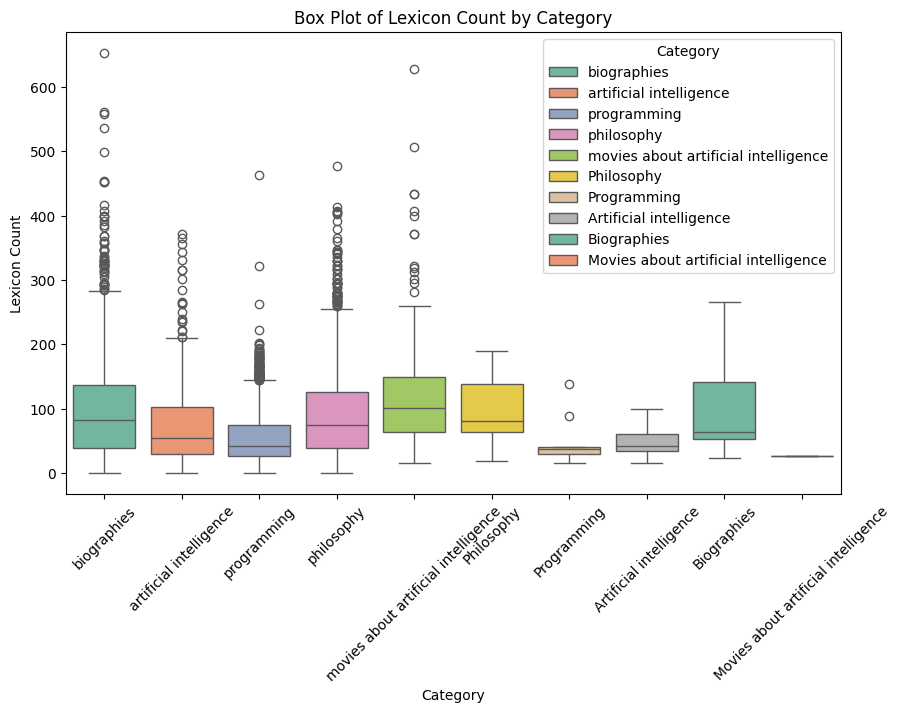

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Box plot of lexicon_count by category
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='category', y='lexicon_count', hue='category', palette='Set2')
plt.title('Box Plot of Lexicon Count by Category')
plt.xlabel('Category')
plt.ylabel('Lexicon Count')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()

In [ ]:
# Handling class imbalance


# Fixing class label inconsistencies
df['category'] = df['category'].str.lower()  # Converting all category labels to lowercase
class_counts = df['category'].value_counts()
print("Fixed Class Distribution:")
print(class_counts)

# Handle missing values
# Drop rows with missing values in 'category' column
df.dropna(subset=['category'], inplace=True)

# Impute missing values in 'difficult_words' column with the mean
mean_difficult_words = df['difficult_words'].mean()
df['difficult_words'].fillna(mean_difficult_words, inplace=True)

# Verify that missing values have been handled
missing_values_after_handling = df.isnull().sum()
print("\nMissing Values after Handling:")
print(missing_values_after_handling)


Fixed Class Distribution:
biographies                             2955
philosophy                              2598
programming                             1990
artificial intelligence                 1576
movies about artificial intelligence     167
Name: category, dtype: int64

Missing Values after Handling:
par_id                   0
paragraph                0
has_entity               0
lexicon_count            0
difficult_words          0
last_editor_gender       0
category                 0
text_clarity          9277
dtype: int64


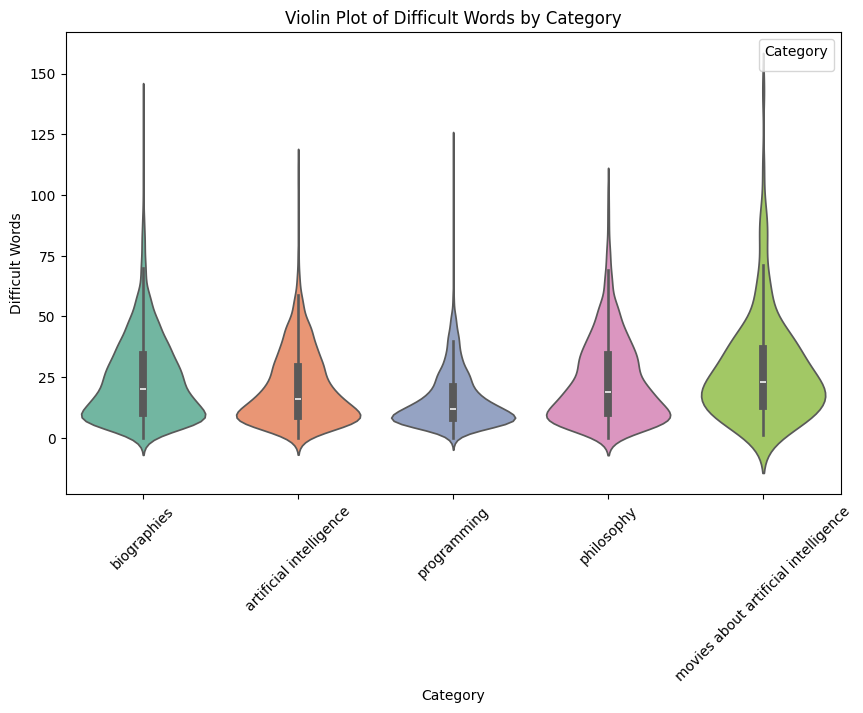

In [ ]:
# Violin plot of difficult_words by category
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='category', y='difficult_words', hue='category', palette='Set2')
plt.title('Violin Plot of Difficult Words by Category')
plt.xlabel('Category')
plt.ylabel('Difficult Words')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()

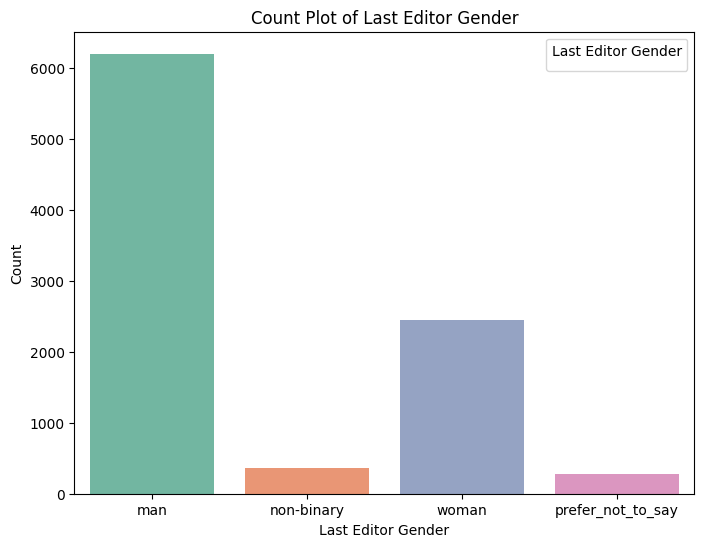

In [ ]:
# Count plot of last_editor_gender
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='last_editor_gender', hue='last_editor_gender', palette='Set2')
plt.title('Count Plot of Last Editor Gender')
plt.xlabel('Last Editor Gender')
plt.ylabel('Count')
plt.legend(title='Last Editor Gender')
plt.show()

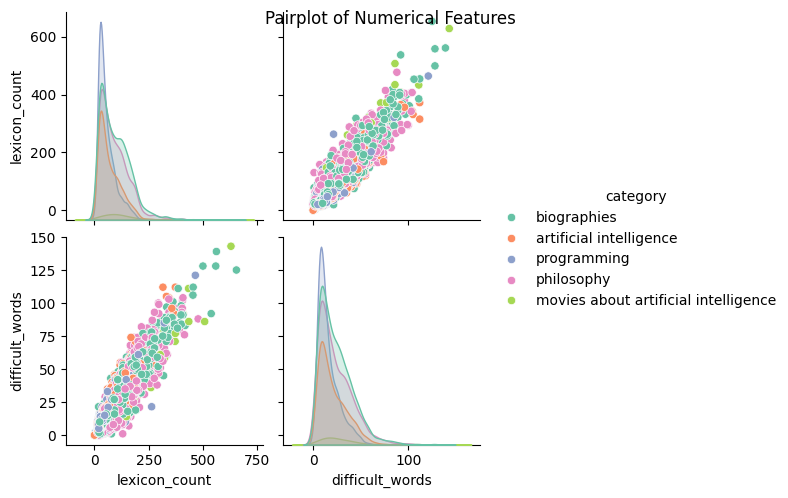

In [ ]:
# Pairplot for visualizing relationships between numerical features
sns.pairplot(df[['lexicon_count', 'difficult_words', 'has_entity', 'category']], hue='category', palette='Set2')
plt.suptitle('Pairplot of Numerical Features')
plt.show()

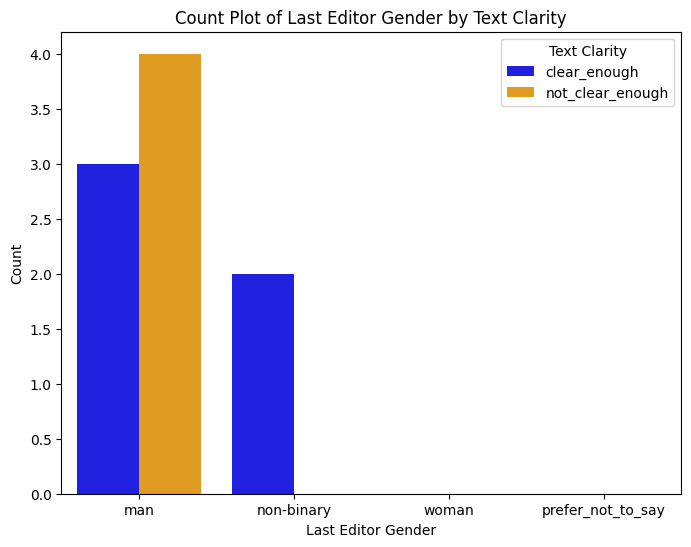

In [ ]:
# Defining a color palette for different categories of text_clarity
palette = {'clear_enough': 'blue', 'not_clear_enough': 'orange'}
# Count plot of last_editor_gender by text_clarity
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='last_editor_gender', hue='text_clarity', palette=palette)
plt.title('Count Plot of Last Editor Gender by Text Clarity')
plt.xlabel('Last Editor Gender')
plt.ylabel('Count')
plt.legend(title='Text Clarity')
plt.show()

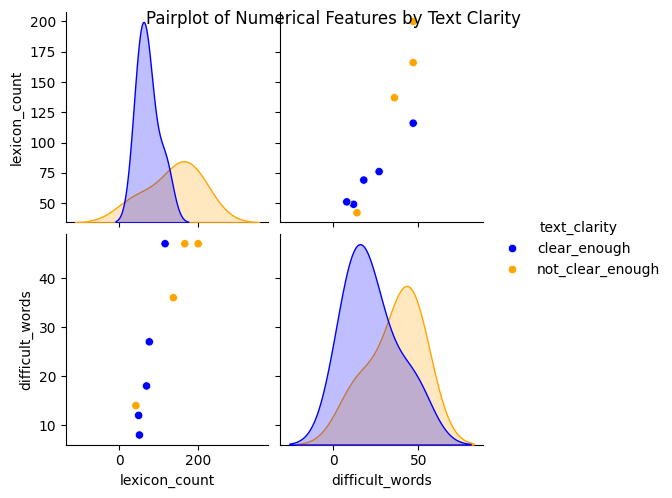

In [ ]:
# Pairplot for visualizing relationships between numerical features by text_clarity
sns.pairplot(df[['lexicon_count', 'difficult_words', 'has_entity', 'text_clarity']], hue='text_clarity', palette=palette)
plt.suptitle('Pairplot of Numerical Features by Text Clarity')
plt.show()

<ipython-input-35-269065334011>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='text_clarity', y='lexicon_count', palette=palette)


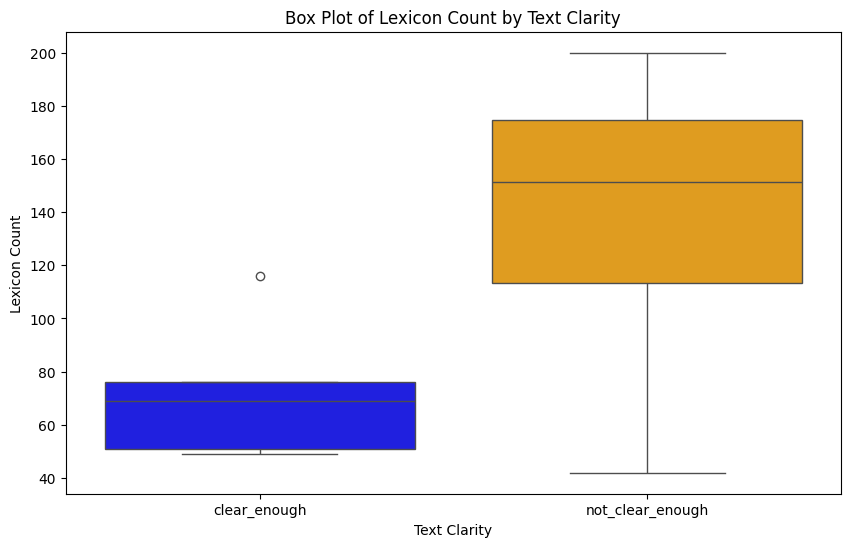

In [ ]:
# Box plot of lexicon_count by text_clarity
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='text_clarity', y='lexicon_count', palette=palette)
plt.title('Box Plot of Lexicon Count by Text Clarity')
plt.xlabel('Text Clarity')
plt.ylabel('Lexicon Count')
plt.show()


<ipython-input-36-faa9c33b72d0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='text_clarity', y='difficult_words', palette=palette)


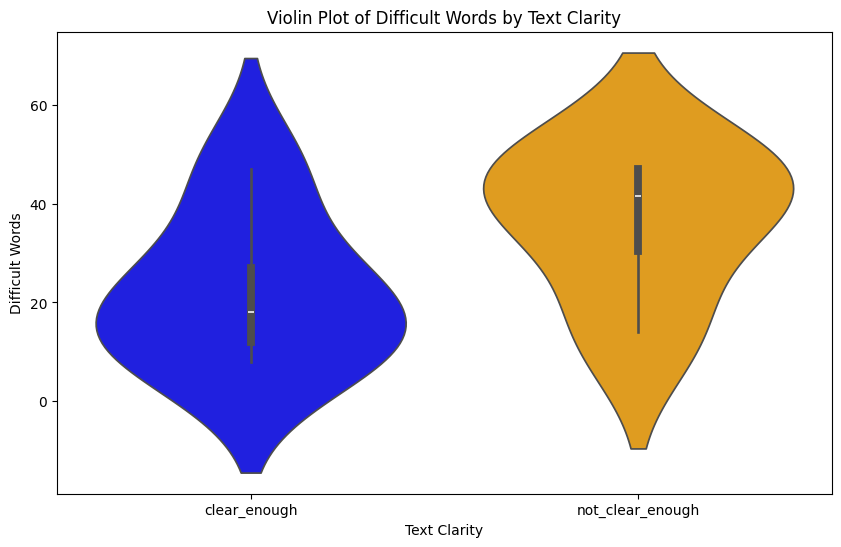

In [ ]:
# Violin plot of difficult_words by text_clarity
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='text_clarity', y='difficult_words', palette=palette)
plt.title('Violin Plot of Difficult Words by Text Clarity')
plt.xlabel('Text Clarity')
plt.ylabel('Difficult Words')
plt.show()

# **Task 1: Text Classification**

### **Import necessary libraries**

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

### **Drop rows with missing values in 'category' column**

In [ ]:
df.dropna(subset=['category'], inplace=True)

### **Encode categorical feature 'has_entity'**

In [ ]:
df['has_entity'] = df['has_entity'].apply(lambda x: 1 if 'YES' in x else 0)

### **Split the data into train and test sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['paragraph', 'has_entity']], df['category'], test_size=0.2, random_state=42)


### **Vectorize the 'paragraph' feature using TF-IDF**

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['paragraph'])
X_test_tfidf = tfidf_vectorizer.transform(X_test['paragraph'])


### **Training a logistic regression model**






In [ ]:

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8939720129171151

Classification Report:
                                       precision    recall  f1-score   support

             artificial intelligence       0.89      0.85      0.87       305
                         biographies       0.92      0.91      0.91       622
movies about artificial intelligence       0.96      0.73      0.83        30
                          philosophy       0.85      0.89      0.87       500
                         programming       0.91      0.93      0.92       401

                            accuracy                           0.89      1858
                           macro avg       0.91      0.86      0.88      1858
                        weighted avg       0.89      0.89      0.89      1858



### **Training a Random Forest classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_rf = random_forest.predict(X_test_tfidf)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.817545748116254

Random Forest Classification Report:
                                       precision    recall  f1-score   support

             artificial intelligence       0.88      0.62      0.73       305
                         biographies       0.84      0.89      0.87       622
movies about artificial intelligence       1.00      0.27      0.42        30
                          philosophy       0.75      0.85      0.80       500
                         programming       0.83      0.86      0.85       401

                            accuracy                           0.82      1858
                           macro avg       0.86      0.70      0.73      1858
                        weighted avg       0.82      0.82      0.81      1858



### **Training a Support Vector Machine classifier**

In [ ]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_svm = svm_classifier.predict(X_test_tfidf)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.8896663078579118

SVM Classification Report:
                                       precision    recall  f1-score   support

             artificial intelligence       0.86      0.86      0.86       305
                         biographies       0.92      0.90      0.91       622
movies about artificial intelligence       0.96      0.83      0.89        30
                          philosophy       0.84      0.88      0.86       500
                         programming       0.92      0.91      0.91       401

                            accuracy                           0.89      1858
                           macro avg       0.90      0.88      0.89      1858
                        weighted avg       0.89      0.89      0.89      1858



## **Prediction**

In [ ]:
import pandas as pd

# Create a DataFrame to store the actual labels and predictions
results = pd.DataFrame({'True_Label': y_test,
                        'Logistic_Regression_Prediction': y_pred,
                        'Random_Forest_Prediction': y_pred_rf,
                        'SVM_Prediction': y_pred_svm})

# Display the first few rows of the results DataFrame
print("Actual Labels and Predictions:")
print(results.head())


Actual Labels and Predictions:
       True_Label Logistic_Regression_Prediction Random_Forest_Prediction  \
132   programming                    programming              programming   
6062   philosophy                     philosophy               philosophy   
768   programming                    biographies              biographies   
2963  biographies                    biographies              biographies   
1051  biographies                    biographies              biographies   

     SVM_Prediction  
132     programming  
6062     philosophy  
768     biographies  
2963    biographies  
1051    biographies  


### **predicting a new paragraph interactively**

In [ ]:

new_paragraph = input("Enter your paragraph: ")

# Transform the new paragraph using the TF-IDF vectorizer
new_paragraph_tfidf = tfidf_vectorizer.transform([new_paragraph])

# Predict the category using the trained SVM model
predicted_category = svm_classifier.predict(new_paragraph_tfidf)
print("\nPredicted Category for the New Paragraph:", predicted_category[0])

Enter your paragraph: In the coming years, we will be able to see more applications of AI as this technology is evolving day by day.

Predicted Category for the New Paragraph: artificial intelligence


# **Task 2: Text Clarity Classification**

## **Using Word Embeddings**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import gensim.downloader as api
from sklearn.semi_supervised import SelfTrainingClassifier

# Load pre-trained word embeddings (Word2Vec)
word_vectors = api.load("word2vec-google-news-300")

# Function to calculate the average word vector for a paragraph
def average_word_vectors(paragraph):
    words = paragraph.split()
    word_vectors_list = [word_vectors[word] for word in words if word in word_vectors]
    if word_vectors_list:
        return sum(word_vectors_list) / len(word_vectors_list)
    else:
        return [0] * 300  # Return a vector of zeros if no word vectors are found



[==================================================] 100.0% 1662.8/1662.8MB downloaded


### **Labeling a subset of the data**

In [ ]:

df['text_clarity'] = 'not_clear_enough'  # Default label for all rows
df.loc[:99, 'text_clarity'] = 'clear_enough'  # Label the first 100 rows as clear enough


### **Drop rows with missing values**

In [ ]:

df.dropna(subset=['paragraph', 'text_clarity'], inplace=True)


**Split data into train and test sets  and Converting paragraphs to average word vectors**

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(df['paragraph'], df['text_clarity'], test_size=0.2, random_state=42)

X_train_word_vectors = X_train.apply(average_word_vectors).tolist()
X_test_word_vectors = X_test.apply(average_word_vectors).tolist()


### **Train SVM classifier**

In [ ]:

svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_word_vectors, y_train)

# Predictions
y_pred = svm_classifier.predict(X_test_word_vectors)

### **Evaluating model**

In [ ]:

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

Accuracy: 0.9844919786096257

Classification Report:
                   precision    recall  f1-score   support

    clear_enough       0.00      0.00      0.00        29
not_clear_enough       0.98      1.00      0.99      1841

        accuracy                           0.98      1870
       macro avg       0.49      0.50      0.50      1870
    weighted avg       0.97      0.98      0.98      1870



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Predicting for one input paragraph**

In [ ]:
# Prompt for input paragraph
input_paragraph = input("Input paragraph: ")

# Label the input paragraph as 'not_clear_enough' by default
input_label = 'not_clear_enough'

# Preprocess the input paragraph
input_word_vector = average_word_vectors(input_paragraph)

# Predict using the trained SVM classifier
prediction = svm_classifier.predict([input_word_vector])[0]

# Map the prediction to the label
if prediction == 'clear_enough':
    input_label = 'clear_enough'


# Print the predicted label for the input paragraph
print("Predicted label:", input_label)

Input paragraph: Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nullam dictum convallis felis, eget tincidunt felis tempor vel. Vivamus aliquet, ligula id tristique posuere, nunc metus finibus diam, nec commodo libero magna vitae sapien. Ut lacinia hendrerit mi, eu cursus justo laoreet sit amet. Donec aliquet, odio non convallis ultrices, libero leo aliquam eros, nec dapibus magna nisi at dui. Vivamus volutpat mauris et elit aliquet, quis tincidunt odio venenatis. Duis tincidunt lectus nec mauris ullamcorper, sed facilisis sapien pharetra. Vestibulum pharetra neque et augue suscipit, at consequat libero posuere.
Predicted label: not_clear_enough


In [ ]:
# Consider ethical implications and risks
# Address potential biases in the data and model, and discuss the impact of automatically rejecting users' work

### **Advanced techniques: Semi-supervised learning**

In [ ]:

# Initialize SelfTrainingClassifier
self_training_classifier = SelfTrainingClassifier(SVC(kernel='linear', random_state=42))

# Train semi-supervised classifier
self_training_classifier.fit(X_train_word_vectors, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_self_training.py:212: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)


SelfTrainingClassifier(base_estimator=SVC(kernel='linear', random_state=42))

### **Predictions using semi-supervised classifier**

In [ ]:

y_pred_semi_supervised = self_training_classifier.predict(X_test_word_vectors)

# Evaluate semi-supervised model
accuracy_semi_supervised = accuracy_score(y_test, y_pred_semi_supervised)
report_semi_supervised = classification_report(y_test, y_pred_semi_supervised)

# Print semi-supervised results
print("\nSemi-Supervised Learning - Accuracy:", accuracy_semi_supervised)
print("\nSemi-Supervised Learning - Classification Report:\n", report_semi_supervised)



Semi-Supervised Learning - Accuracy: 0.9844919786096257

Semi-Supervised Learning - Classification Report:
                   precision    recall  f1-score   support

    clear_enough       0.00      0.00      0.00        29
not_clear_enough       0.98      1.00      0.99      1841

        accuracy                           0.98      1870
       macro avg       0.49      0.50      0.50      1870
    weighted avg       0.97      0.98      0.98      1870



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd

# Combine actual and predicted labels with corresponding paragraphs
results_df = pd.DataFrame({'Actual_Label': y_test, 'Predicted_Label': y_pred_semi_supervised, 'Paragraph': X_test})

# Display the DataFrame
print("Actual vs Predicted Labels with Corresponding Paragraphs:")
print(results_df)


Actual vs Predicted Labels with Corresponding Paragraphs:
          Actual_Label   Predicted_Label  \
4482  not_clear_enough  not_clear_enough   
6425  not_clear_enough  not_clear_enough   
8341  not_clear_enough  not_clear_enough   
1915  not_clear_enough  not_clear_enough   
1479  not_clear_enough  not_clear_enough   
...                ...               ...   
5336  not_clear_enough  not_clear_enough   
794   not_clear_enough  not_clear_enough   
2826  not_clear_enough  not_clear_enough   
3017  not_clear_enough  not_clear_enough   
5695  not_clear_enough  not_clear_enough   

                                              Paragraph  
4482  In 1896, FitzGerald and John Perry obtained a ...  
6425   . For a more detailed derivation and more int...  
8341   Therefore, having minimal patient data on min...  
1915  Product stewardship includes waste disposal me...  
1479  Recursive allocatable components – as an alter...  
...                                                 ...  
5336  H